In [3]:
# ===============================
# 📌 Task 3 - Credit Card Fraud Detection
# ===============================

# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
import joblib

# ===============================
# 📌 Load Dataset
# ===============================
print("Working directory:", os.getcwd())
print("Data folder contents:", os.listdir('data'))

df = pd.read_csv('data/creditcard.csv')
print("\nDataset shape:", df.shape)
df.head()


Working directory: c:\Users\sminu\Task3_Credit_Card_Fraud_Detection
Data folder contents: ['creditcard.csv']

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


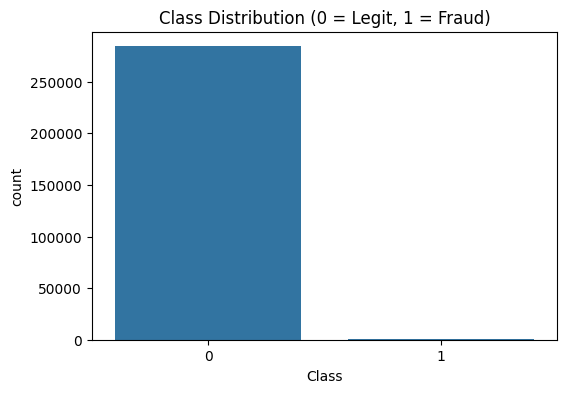

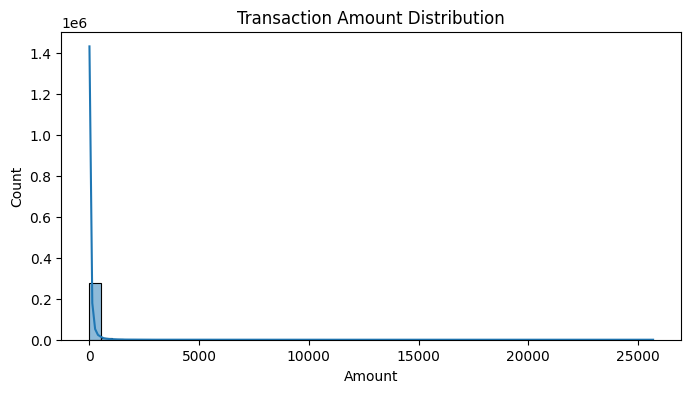

In [4]:
# ===============================
# 📌 Basic EDA
# ===============================
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

print("\nClass distribution:\n", df['Class'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


In [5]:
# ===============================
# 📌 Features & Target
# ===============================
X = df.drop('Class', axis=1)
y = df['Class']

# Train/Test split (stratified so fraud ratio preserved in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class counts:\n", y_train.value_counts())
print("Test class counts:\n", y_test.value_counts())


Train class counts:
 Class
0    227451
1       394
Name: count, dtype: int64
Test class counts:
 Class
0    56864
1       98
Name: count, dtype: int64


In [6]:
# ===============================
# 📌 Scale 'Amount' and 'Time'
# ===============================
scaler = StandardScaler()

# Scale only 'Amount' and 'Time' (others are PCA features already standardized)
X_train[['Amount','Time']] = scaler.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']] = scaler.transform(X_test[['Amount','Time']])


In [7]:
# ===============================
# 📌 Handle Imbalance with SMOTE
# ===============================
print("Before SMOTE:", y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


Logistic Regression Metrics:
Accuracy: 0.9742108774270566
Precision: 0.058027079303675046
Recall: 0.9183673469387755
F1: 0.1091570648878108
ROC AUC: 0.9698631105509169


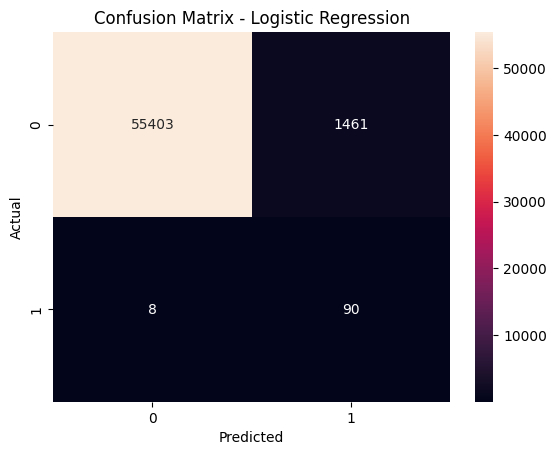

In [8]:
# ===============================
# 📌 Train Logistic Regression
# ===============================
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Metrics:
Accuracy: 0.9994557775359011
Precision: 0.845360824742268
Recall: 0.8367346938775511
F1: 0.841025641025641
ROC AUC: 0.973103297664029


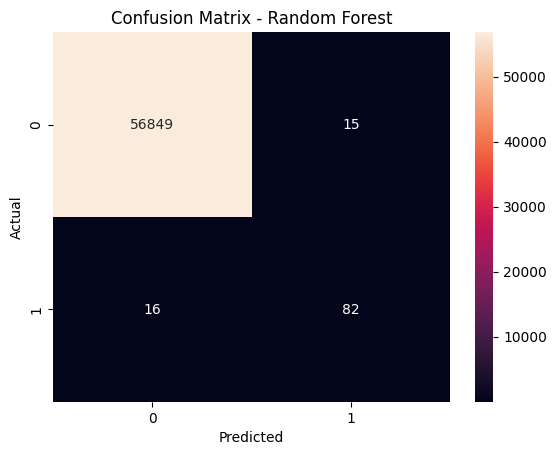

In [9]:
# ===============================
# 📌 Train Random Forest (Alternative)
# ===============================
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


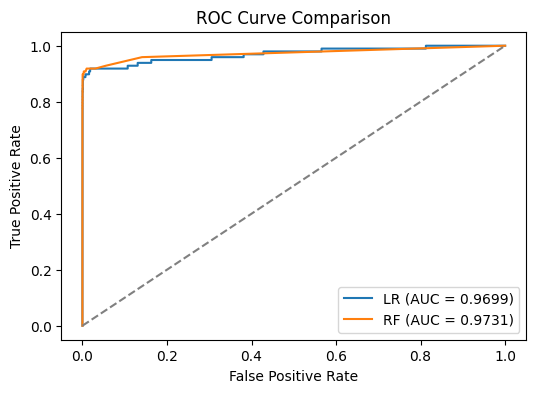

In [10]:
# ===============================
# 📌 ROC Curve Comparison
# ===============================
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [11]:
# ===============================
# 📌 Save Best Model
# ===============================
joblib.dump(rf, 'credit_fraud_rf_model.joblib')
print("✅ Saved Random Forest model to credit_fraud_rf_model.joblib")


✅ Saved Random Forest model to credit_fraud_rf_model.joblib
